# ECBM E4040 - Assignment 2- Task 5: Kaggle Open-ended Competition

Kaggle is a platform for predictive modelling and analytics competitions in which companies and researchers post data and statisticians and data miners compete to produce the best models for predicting and describing the data.

If you don't have a Kaggle account, feel free to join at [www.kaggle.com](https://www.kaggle.com). To let the CAs do the grading more conveniently, please __use Lionmail to join Kaggle__ and __use UNI as your username__.

The website for this competition is: 
https://www.kaggle.com/c/e4040fall2019-assignment-2-task-5

You can find detailed description about this in-class competition on the website above. Please read carefully and follow the instructions.

<span style="color:red">__TODO__:</span>
1. Train a custom model for the bottle dataset classification problem. You are free to use any methods taught in the class or found by yourself on the Internet (ALWAYS provide reference to the source) but __TF 2.0 is not allowed to use in this competition__. General training methods include:
    * Dropout
    * Batch normalization
    * Early stopping
    * l1-norm & l2-norm penalization
2. You'll be given the test set to generate your predictions (70% public + 30% private, but you don't know which ones are public/private). Achieve 70% accuracy on the public test set. The accuracy will be shown on the public leaderboard once you submit your prediction .csv file. The private leaderboard would be released after the competition. The final ranking would based on that result, not the public one.
3. 

    * Report your results on the Kaggle, for comparison with other students' optimal results (you can do this several times). 
    * Save your best model, using Github Classroom, at the same time when you submit the homework files into Courseworks. See instructions below. 

__Hint__: You can start from what you implemented in task 4. Another classic classification model named 'VGG16' can also be easily implemented.

## HW Submission Details:
There are three components to reporting the results of this task: 

**(A) Submission (up to 20 submissions each day) of the .csv prediction file throught the Kaggle platform;**. You should start doing this __VERY early__, so that students can compare their work as they are making progress with model optimization.

**(B) Editing and submitting the content of this Jupyter notebook, through Courseworks; **
(i) The code for your CNN model and for the training function. The code should be stored in __./ecbm4040/neuralnets/kaggle.py__;
(ii) Print out your training process and accuracy __within this notebook__;

**(C) Submitting your best CNN model through Github Classroom repo.**

**Description of (C):** 
For this task, we will continue to use Github classroom to save your model for submission. 

<span style="color:red">__Submission content:__ :</span>
(i) In your Assignment 2 submission folder, create a subfolder called __KaggleModel__. Upload your best model with all the data output (for example, __MODEL.data-00000-of-00001, MODEL.meta, MODEL.index__) into the folder. 
(ii) Remember to delete any intermediate results, **we only want your best model. Do not upload any data files**. The instructors will rerun the uploaded best model and verify against the score which you reported on the Kaggle.



## Train your model here

In [1]:
# YOUR CODE HERE
# YOUR CODE HERE
%matplotlib inline
%load_ext autoreload
%autoreload 2

from PIL import Image
import glob, os
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import pickle
from os import listdir
from os.path import isfile, join
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import Xception
# from tensorflow.keras.applications import ResNet
# from tensorflow.keras.applications import ResNetV2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
# from tensorflow.keras.applications import DenseNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# from utils.cifar_utils import load_data
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
train_dir = './data/Kaggle/kaggle_train_128/train_128/'

# Training data
X_train = []
y_train = []
for i in range(5):
    subdir = train_dir + str(i) + '/' # folders 0-4
    print(subdir)
    only_train_files = [f for f in listdir(subdir) if isfile(join(subdir, f))]  # all .png files
    for o_train in only_train_files:
        im_train = Image.open(subdir + o_train)
        X_train.append(np.array(im_train))
        im_train.close()
        y_train.append(i)

test_dir = './data/Kaggle/kaggle_test_128/test_128/'

# Test data
X_test = []
only_test_files = [g for g in listdir(test_dir) if isfile(join(test_dir, g))]  # all .png files
for o_test in only_test_files:
    im_test = Image.open(test_dir + o_test)
    X_test.append(np.array(im_test))
    im_test.close()

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

./data/Kaggle/kaggle_train_128/train_128/0/
./data/Kaggle/kaggle_train_128/train_128/1/
./data/Kaggle/kaggle_train_128/train_128/2/
./data/Kaggle/kaggle_train_128/train_128/3/
./data/Kaggle/kaggle_train_128/train_128/4/
(15000, 128, 128, 3)
(15000,)
(3500, 128, 128, 3)


In [3]:
X = X_train
y = y_train

# Split training data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image


In [4]:
print('Train data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)

y_train_dummy = tf.keras.utils.to_categorical(y_train)
y_val_dummy = tf.keras.utils.to_categorical(y_val)
print('Train labels shape (one-hot): ', y_train_dummy.shape)
print('Validation labels shape (one-hot): ', y_val_dummy.shape)

Train data shape:  (12000, 128, 128, 3)
Training labels shape:  (12000,)
Validation data shape:  (3000, 128, 128, 3)
Validation labels shape:  (3000,)
Test data shape:  (3500, 128, 128, 3)
Train labels shape (one-hot):  (12000, 5)
Validation labels shape (one-hot):  (3000, 5)


In [5]:
#imports the mobilenet model and discards the last 1000 neuron layer.
base_model=MobileNet(weights='imagenet',include_top=False) 
# base_model=VGG16(weights='imagenet',include_top=False) 
# base_model=Xception(weights='imagenet',include_top=False) 
# base_model=VGG19(weights='imagenet',include_top=False) 
# base_model=InceptionV3(weights='imagenet',include_top=False) 
# base_model=InceptionResNetV2(weights='imagenet',include_top=False) 
# base_model=MobileNetV2(weights='imagenet',include_top=False) 
# base_model=NASNet(weights='imagenet',include_top=False) 


x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #dense layer 1
x=BatchNormalization()(x)
x=Dropout(0.5)(x)
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(5,activation='softmax')(x) #final layer with softmax activation

/home/ecbm4040/miniconda3/envs/envTF113/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model=Model(inputs=base_model.input,outputs=preds)

In [7]:
for layer in model.layers[:15]:
    layer.trainable=False
for layer in model.layers[15:]:
    layer.trainable=True

In [8]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
# model.summary()
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [9]:
# bs = 98 #batch size
# bs = 50 #batch size - submission 1
bs= 16 # submission 2
epc = 20 #number of epoches
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
train_generator = train_datagen.flow(X_train, y_train_dummy, batch_size=bs)
step_size_train=train_generator.n//train_generator.batch_size

In [10]:
# train the model
history = model.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=(X_val, y_val_dummy))

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
750/750 [==============================] - 80s 107ms/step - loss: 0.4872 - acc: 0.8473 - val_loss: 1.4446 - val_acc: 0.6853
Epoch 2/20
750/750 [==============================] - 56s 74ms/step - loss: 0.2192 - acc: 0.9398 - val_loss: 1.1255 - val_acc: 0.7117
Epoch 3/20
750/750 [==============================] - 55s 74ms/step - loss: 0.1807 - acc: 0.9517 - val_loss: 0.7315 - val_acc: 0.7613
Epoch 4/20
750/750 [==============================] - 56s 74ms/step - loss: 0.1638 - acc: 0.9584 - val_loss: 0.9282 - val_acc: 0.6777
Epoch 5/20
750/750 [==============================] - 56s 75ms/step - loss: 0.1402 - acc: 0.9656 - val_loss: 0.9392 - val_acc: 0.6817
Epoch 6/20
750/750 [==============================] - 56s 74ms/step - loss: 0.1216 - acc: 0.9702 - val_loss: 0.9264 - val_acc: 0.7333
Epoch 7/20
750/750 [==============================] - 55s 74ms/step - loss: 0.1380 - acc: 0.9663 - val_loss: 1.6335 - val_acc: 0.7417
Epoch 8/20
75

In [11]:
print(f'Baseline accuracy: {model.evaluate(X_val, y_val_dummy)[1]}')

3000/3000 [==============================] - 4s 1ms/sample - loss: 1.2109 - acc: 0.6863
Baseline accuracy: 0.6863333582878113


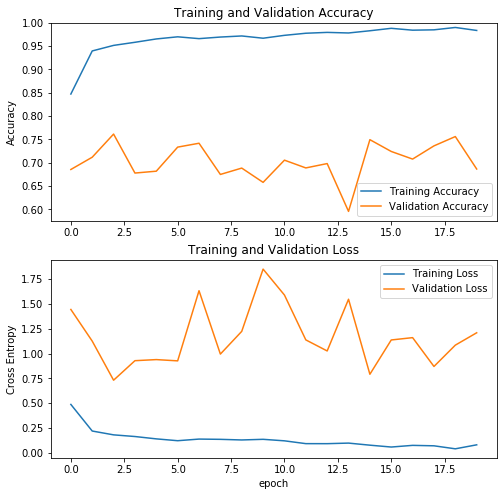

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [13]:
# model.save("Kaggle")

In [14]:
# print(f'test predictions: {model.predict(X_test)}')

In [16]:
mean_image = np.mean(X_test, axis=0)
# X_test = X_test.astype(np.float32) - mean_image.astype(np.float32)

In [17]:
preds=model.predict(X_test)

In [18]:
dd = []
for i in range(preds.shape[0]):
    datum = preds[i]
#     print('index: %d' % i)
#     print('encoded datum: %s' % datum)
    decoded_datum = np.argmax(preds[i])
#     print('decoded datum: %s' % decoded_datum)
#     print()
    dd.append(decoded_datum)

## Save your best model

## Generate .csv file for Kaggle

In [19]:
# The following code snippet can be used to generate your prediction .csv file.

import csv
with open('prediction_labels_11_04_005.csv','w') as csvfile:
    fieldnames = ['Id','label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for index,l in enumerate(dd):
        filename = str(index)+'.png'
        label = str(l)
        writer.writerow({'Id': filename, 'label': label})


In [20]:
import time

cur_model_name = 'kaggle_{}'.format(int(time.time()))

with tf.Session() as sess:
    merge = tf.summary.merge_all()
    writer = tf.summary.FileWriter("log/{}".format(cur_model_name), sess.graph)
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    saver.save(sess, 'KaggleModel/{}'.format(cur_model_name))
